## Question 1

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from copy import deepcopy
from numpy import linalg as LA
import pandas as pd
from sklearn import neighbors
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
random.seed(42)

In [55]:
train_df = pd.read_csv('intrusion_detection1/data.csv')

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,:-1], train_df['xAttack'], test_size=0.2) 

In [57]:
#X_train

#### Part-1:
Do dimensionality reduction using PCA on given dataset

In [58]:
class pca:
    def __init__(self):
        self.mean = 0
        self.std = 0
    def pca_data(self,X):
        self.mean = X.mean()
        self.std = X.std()
        X_nor = (X - X.mean())/X.std()
        #print(X_nor)
        mean_vec = np.mean(X_nor, axis=0)
        cov_mat = (X_nor - mean_vec).T.dot((X_nor - mean_vec)) / (X_nor.shape[0]-1)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        s = np.sum(eig_vals)
        for i in range(len(eig_vals)):
            v = np.sum(eig_vals[:i])/s
            if v > 0.9:
                re_err = v
                self.k = i
                break
        #print(self.k)
        #print(eig_vals)
        tr_dt = np.dot(X_nor, eig_vecs.T[:self.k].T)
        tr_re = np.dot(tr_dt,eig_vecs.T[:self.k])
        #re_err = LA.norm((X_nor-tr_re),None)
        return tr_dt, re_err
    def pca_val(self, X):
        X_nor = (X - self.mean)/self.std
        cov_mat = (X_nor - mean_vec).T.dot((X_nor - mean_vec)) / (X_nor.shape[0]-1)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        tr_dt = np.dot(X_nor, eig_vecs.T[:self.k].T)
        tr_re = np.dot(tr_dt,eig_vecs.T[:self.k])
        return tr_dt

In [59]:
pcacomp = pca()
tr_dt, re_err = pcacomp.pca_data(train_df.drop('xAttack', axis=1))

In [60]:
#re_err

#### Part-2:
Use the reduced dimensions from the first part and perform K-
means clustering with k equal to five(number of classes in the data). Also calculate
the purity of clusters with given class label. Purity is the fraction of actual class
samples in that cluster. You are not allowed to use inbuilt function for K-means.

In [61]:
class kmeans:
    def __init__(self, k):
        self.k=5
    def train(self,X):
        centroid = random.sample(list(X), self.k)
        C = np.asarray(centroid)
        C_old = np.zeros(np.asarray(centroid).shape)
        clusters = np.zeros(len(X))
        error = self.dist(C, C_old, None)
        while error != 0:
            for i in range(len(X)):
                distances = self.dist(X[i], C)
                cluster = np.argmin(distances)
                clusters[i] = cluster
            C_old = deepcopy(C)
            for i in range(self.k):
                points = [X[j] for j in range(len(X)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
            error = self.dist(C, C_old, None)
        for i in range(len(X)):
            distances = self.dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        return clusters
    def dist(self, a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)

In [62]:
km = kmeans(k=5)
labels0 = km.train(tr_dt)

In [64]:
pur = np.zeros((5,3), dtype='int')

In [65]:
from collections import Counter
print("Purity of clusters are:")
for i in range(5):
        points = [train_df['xAttack'][j] for j in range(len(train_df)) if labels0[j] == i]
        c = Counter(list(points))
        print(c)
        pur[i][0]  = int(100*c.most_common()[0][1]/sum(c.values()))
        print("Cluster {0}: {1}".format(i, c.most_common()[0][1]/sum(c.values())))

Purity of clusters are:
Counter({'normal': 9145, 'dos': 704, 'r2l': 3, 'probe': 2, 'u2r': 1})
Cluster 0: 0.9279553526128869
Counter({'dos': 1364, 'probe': 1053, 'normal': 522, 'r2l': 10})
Cluster 1: 0.46252967107494064
Counter({'normal': 3542, 'probe': 371, 'dos': 230, 'r2l': 145, 'u2r': 9})
Cluster 2: 0.8242960204794042
Counter({'probe': 818, 'normal': 135, 'r2l': 39, 'dos': 16})
Cluster 3: 0.8115079365079365
Counter({'dos': 6800, 'probe': 69, 'normal': 20})
Cluster 4: 0.9870808535346204


#### Part-3
Perform GMM (with five Gaussian) on the reduced dimensions
from first part and calculate the purity of clusters. You can use python library for
GMM.

In [66]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(tr_dt)
labels1 = gmm.predict(tr_dt)

In [67]:
from collections import Counter
print("Purity of clusters are:")
for i in range(5):
        points = [train_df['xAttack'][j] for j in range(len(train_df)) if labels1[j] == i]
        c = Counter(list(points))
        print(c)
        pur[i][1] = int(100*c.most_common()[0][1]/sum(c.values()))
        print("Cluster {0}: {1}".format(i, c.most_common()[0][1]/sum(c.values())))

Purity of clusters are:
Counter({'dos': 6517})
Cluster 0: 1.0
Counter({'normal': 656, 'dos': 537, 'r2l': 90, 'probe': 67, 'u2r': 7})
Cluster 1: 0.4834193072955048
Counter({'normal': 2781, 'dos': 1475, 'probe': 1351, 'r2l': 13})
Cluster 2: 0.49483985765124555
Counter({'normal': 8})
Cluster 3: 1.0
Counter({'normal': 9919, 'probe': 895, 'dos': 585, 'r2l': 94, 'u2r': 3})
Cluster 4: 0.8628218510786361


#### Part-4: 
Perform Hierarchical clustering with single-linkage and five
clusters. Also calculate the purity of clusters. Create a pie chart comparing purity
of different clustering methods you have tried for all classes. You can use python
library for hierarchical clustering.

In [68]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='single').fit(tr_dt)
labels2 = clustering.labels_

In [69]:
from collections import Counter
print("Purity of clusters are:")
for i in range(5):
        points = [train_df['xAttack'][j] for j in range(len(train_df)) if labels2[j] == i]
        c = Counter(list(points))
        print(c)
        pur[i][2] = int(100*c.most_common()[0][1]/sum(c.values()))
        print("Cluster {0}: {1}".format(i, c.most_common()[0][1]/sum(c.values())))

Purity of clusters are:
Counter({'normal': 13360, 'dos': 9114, 'probe': 2312, 'r2l': 193, 'u2r': 10})
Cluster 0: 0.5346352395053824
Counter({'probe': 1})
Cluster 1: 1.0
Counter({'r2l': 4, 'normal': 2})
Cluster 2: 0.6666666666666666
Counter({'normal': 1})
Cluster 3: 1.0
Counter({'normal': 1})
Cluster 4: 1.0


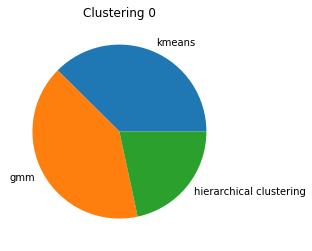

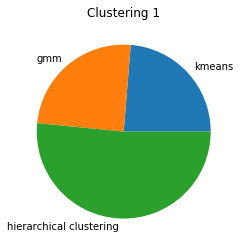

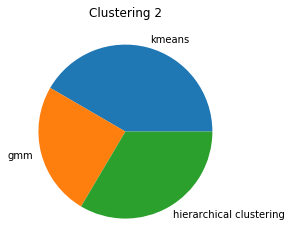

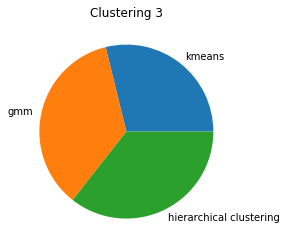

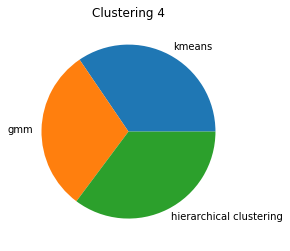

In [70]:
label = ['kmeans', 'gmm', 'hierarchical clustering']
for i in range(5):
    #print(pur[i,:])
    plt.pie(pur[i,:], labels = label)
    plt.title("Clustering "+str(i))
    plt.show()

#### Part-5: 
Original data of network user activity is available here(https:
//www.kaggle.com/what0919/intrusion-detection). Original data also con-
tains categorical feature. If you were to do dimensionality reduction on original
data, could you use PCA? Justify. Write a paragraph in report for your explana-
tion/justification.

No, we cannot do PCA for categorical dataset, there is a special algorithm called **Factor analysis of mixed data** that is devoted towards handling dimensionality reduction of dataset containing mixed data ie both continuous and categorical.

The data include ${\displaystyle K}$ quantitative variables ${\displaystyle {k=1,\dots ,K}}$ and ${\displaystyle Q}$  qualitative variables ${\displaystyle {q=1,\dots ,Q}}$ .

${\displaystyle z}$ is a quantitative variable. We note:

${\displaystyle r(z,k)}$ the correlation coefficient between variables ${\displaystyle k}$ and ${\displaystyle z}$ ;
${\displaystyle \eta ^{2}(z,q)}$ the squared correlation ratio between variables ${\displaystyle z}$  and ${\displaystyle q}$ .
In the PCA of ${\displaystyle K}$, we look for the function on ${\displaystyle I}$ (a function on ${\displaystyle I}$ assigns a value to each individual, it is the case for initial variables and principal components) the most correlated to all ${\displaystyle K}$ variables in the following sense:

${\displaystyle \sum _{k}r^{2}(z,k)}$ maximum.

In MCA of Q, we look for the function on ${\displaystyle I}$ more related to all ${\displaystyle Q}$ variables in the following sense:

${\displaystyle \sum _{q}\eta ^{2}(z,q)}$ maximum.

In FAMD ${\displaystyle \{K,Q\}}$, we look for the function on ${\displaystyle I}$ the more related to all ${\displaystyle K+Q}$ variables in the following sense:

${\displaystyle \sum _{k}r^{2}(z,k)+\sum _{q}\eta ^{2}(z,q)}$ maximum.

In this criterion, both types of variables play the same role. The contribution of each variable in this criterion is bounded by 1.



## Question 2:
Use the Admission dataset as in the third question for logistic regression.

#### Part 1:
Implement logistic regression model to predict if the student will get admit

In [122]:
train_df = pd.read_csv('AdmissionDataset/data.csv')

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop(['Serial No.','Chance of Admit '], axis=1),train_df['Chance of Admit '], test_size=0.2,shuffle=True)

In [124]:
class logistic_regression:
    def __init__(self, alpha=0.1, iteration=1000, threshold = 0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        theta = np.random.rand(len(x_tr.iloc[0])+1)
        past_costs = []
        past_thetas = [theta]
        x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
        for i in range(self.iterations):
            prediction = self.sigmoid(np.dot(x, theta.T))
            #prediction[prediction>=0.5] = 1
            #prediction[prediction<0.5] = 0
            #print(len(prediction) == len(x_tr))
            error = prediction - y_tr
            #print(error)
            cost = - 1/(m) * (np.dot(y_tr.T, error) + np.dot(1-y_tr,1-error))
            past_costs.append(cost)
            theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
            past_thetas.append(theta)
            self.theta = past_thetas[-1]
        return past_thetas, past_costs
    def predict(self, x_val):
        x_val = (x_val - self.mean)/self.std
        x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
        prediction = self.sigmoid(np.dot(x, self.theta.T))
        prediction[prediction>=self.threshold] = 1
        prediction[prediction<self.threshold] = 0
        return prediction
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [125]:
Y_train[Y_train>=0.5] = 1
Y_train[Y_train<0.5] = 0
Y_val[Y_val>=0.5] = 1
Y_val[Y_val<0.5] = 0

In [126]:
from sklearn.linear_model import LogisticRegression
clf_me = logistic_regression()
clf_sk = LogisticRegression()

In [127]:
past_thetas, past_costs = clf_me.fit(X_train, Y_train)
clf_sk.fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

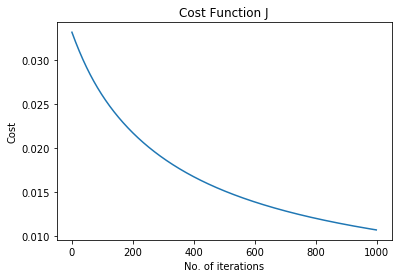

In [128]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [131]:
Y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(Y_pred_me, Y_val)
res = precision_recall_fscore_support(Y_pred_me, Y_val, average = 'binary')
pre_me, re_me, f1_me = res[0], res[1], res[2]
Y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(Y_pred_sk, Y_val)
res = precision_recall_fscore_support(Y_pred_sk, Y_val, average = 'binary')
pre_sk, re_sk, f1_sk = res[0], res[1], res[2]

In [132]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.9666666666666667                0.9555555555555556
precision score:       1.0                1.0
recall score:          0.9659090909090909                0.9550561797752809
f1 score:              0.9826589595375723                0.9770114942528736


#### Part 2:
Compare the performances of logistic regression model with KNN model on the
Admission dataset

In [133]:
class  knearestneighbors:
    def __init__(self, k=1, metric='euclidean'):
        self.k = k
        self.metric = metric
    def fit(self, X_train, Y_train, X_val):
        #self.k = kwargs['k']
        #self.metric = kwargs['metric']
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            #print(lst)
            trg = []
            for f in range(self.k):
                trg.append(lst[f][1])
            #print(i)
            #print(self.k)
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans
    def predict(self, X_train, Y_train, X_val):
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            trg = []
            for f in range(self.k):
                trg.append(lst[f][1])
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans

In [136]:
def k_fold_cross_val(X_train,Y_train, clf, k_fold=10):
    kf = KFold(n_splits=k_fold, shuffle=True)
    accuracy = []
    recall = []
    precision = []
    f1 = []
    for train, test in kf.split(X_train):
        #print(test)
        #X_train, Y_train = train.drop('class', axis = 1), train['class']
        Xtrain, Xtest = X_train.iloc[train], X_train.iloc[test]
        Ytrain, Ytest = Y_train.iloc[train], Y_train.iloc[test]
        ans = clf.fit(Xtrain, Ytrain, Xtest)
        accuracy.append(accuracy_score(Ytest, ans))
        res = precision_recall_fscore_support(Ytest, ans, average='weighted')
        precision.append(res[0])
        recall.append(res[1])
        f1.append(res[2])
    return sum(accuracy)/len(accuracy), sum(precision)/len(precision), sum(recall)/len(recall), sum(f1)/len(f1), 

In [137]:
clf_lg = logistic_regression()
clf_knn = knearestneighbors()

In [138]:
acc_knn, pre_knn, re_knn, f1_knn = k_fold_cross_val(X_train, Y_train, clf_knn)
clf_lg.fit(X_train, Y_train)
Y_pred_lg = clf_lg.predict(X_val)
acc_lg = accuracy_score(Y_pred_lg, Y_val)
res = precision_recall_fscore_support(Y_pred_lg, Y_val, average = 'binary')
pre_lg, re_lg, f1_lg = res[0], res[1], res[2]

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
print("                     logistic regression Classifier      KNN Classifier")
print("accuracy score:        {0}                {1}".format(acc_lg, acc_knn))
print("precision score:       {0}                {1}".format(pre_lg, pre_knn))
print("recall score:          {0}                {1}".format(re_lg, re_knn))
print("f1 score:              {0}                {1}".format(f1_lg, f1_knn))

                     logistic regression Classifier      KNN Classifier
accuracy score:        0.9666666666666667                0.9194444444444445
precision score:       1.0                0.9125263489234079
recall score:          0.9659090909090909                0.9194444444444445
f1 score:              0.9826589595375723                0.9141556253504186


#### Part 3:
Plot a graph explaining the co-relation between threshold value vs precision and
recall. Report the criteria one should use while deciding the threshold value. Explain the reason behind your choice of threshold in your model

In [140]:
acc = []
pre = []
rec = []
f1 = []
for i in  np.linspace(0,1,11):
    clf_lg = logistic_regression(threshold = i)
    clf_lg.fit(X_train, Y_train)
    Y_pred_lg = clf_lg.predict(X_val)
    acc_lg = accuracy_score(Y_pred_lg, Y_val)
    res = precision_recall_fscore_support(Y_pred_lg, Y_val, average = 'binary')
    pre_lg, re_lg, f1_lg = res[0], res[1], res[2]
    #print(i, acc_lg, pre_lg, re_lg, f1_lg)
    acc.append((i,acc_lg))
    pre.append((i,pre_lg))
    rec.append((i,re_lg))
    f1.append((i,f1_lg))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


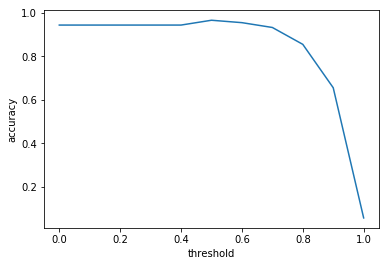

In [141]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(acc[i][0])
    Y_lst.append(acc[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

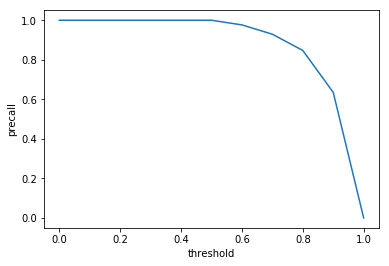

In [142]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(pre[i][0])
    Y_lst.append(pre[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('precall')
plt.show()

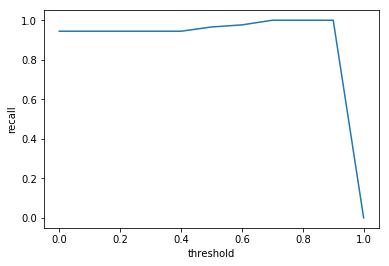

In [143]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(rec[i][0])
    Y_lst.append(rec[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.show()

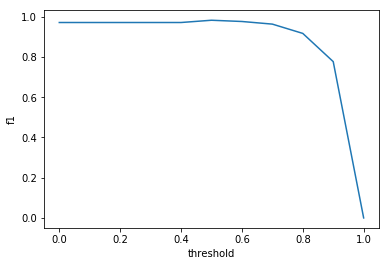

In [144]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(f1[i][0])
    Y_lst.append(f1[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('f1')
plt.show()

## Question 3:
Implement logistic regression using One vs All and One vs One approaches.
Use the following dataset http://preon.iiit.ac.in/~sanjoy_chowdhury/wine-quality.
zip for completing the task. Report your observations and accuracy of the model.

In [146]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [148]:
class logistic_regressionOVA:
    def __init__(self, alpha=0.1, iteration=1000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = []
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for c in range(self.classes):
            y_tr_c = (y_tr==c).astype(int)
            theta = np.random.rand(len(x_tr.iloc[0])+1)
            past_costs = []
            past_thetas = [theta]
            x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
            for i in range(self.iterations):
                prediction = self.sigmoid(np.dot(x, theta.T))
                #prediction[prediction>=0.5] = 1
                #prediction[prediction<0.5] = 0
                #print(len(prediction) == len(x_tr))
                error = prediction - y_tr_c
                #print(error)
                cost = - 1/(m) * (np.dot(y_tr.T, error) + np.dot(1-y_tr,1-error))
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                past_thetas.append(theta)
            self.theta_c.append(theta)
        #print(self.theta_c)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        x_val = (x_val - self.mean)/self.std
        #print(self.theta_c)
        for c in range(self.classes):
            x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
            #print(self.theta_c[c])
            #print()
            prediction = self.sigmoid(np.dot(x, self.theta_c[c].T))
            #print(prediction.shape)
            ans.append(prediction)
            #print(prediction.shape)
        ans = np.array(ans).T
        #print(ans)
        return np.argmax(ans,axis=1)
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [149]:
clf_me = logistic_regressionOVA(classes = 10)

In [150]:
_,_ = clf_me.fit(X_train,Y_train)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf_sk = OneVsRestClassifier(LogisticRegression(random_state=0, solver = 'lbfgs', max_iter=1000)).fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [152]:
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [153]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [154]:
print("                            My One vs All Classifier         Sklearn One vs All Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))

                            My One vs All Classifier         Sklearn One vs All Classifier
accuracy score:               0.5385487528344671                0.5249433106575964


In [155]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [157]:
# One Vs One with all classes available in dataset i.e. 3,4,5,6,7,8,9
class logistic_regressionOVO:
    def __init__(self, alpha=0.1, iteration=10000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = {}
        self.mp = {}
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for i,x in zip(range(len(y_tr.unique().tolist())),y_tr.unique().tolist()):
            self.mp[i]=x
        self.classes = len(y_tr.unique().tolist())
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                #print([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])
                x_tr_c = x_tr[list(x_tr.columns.values)][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c12 = y_tr[:][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c = (y_tr_c12==y_tr.unique().tolist()[c1]).astype(int)
                #print(y_tr_c)
                theta = np.random.rand(len(x_tr.iloc[0])+1)
                past_costs = []
                past_thetas = [theta]
                x = np.c_[np.ones(len(x_tr_c.iloc[:,0])),x_tr_c]
                if len(x_tr_c)>0:
                    for i in range(self.iterations):
                        prediction = self.sigmoid(np.dot(x, theta.T))
                        #prediction[prediction>=0.5] = 1
                        #prediction[prediction<0.5] = 0
                        #print(len(prediction) == len(x_tr))
                        error = prediction - y_tr_c
                        #print(error)
                        cost = -1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                        past_costs.append(cost)
                        theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                        past_thetas.append(theta)
                self.theta_c[(c1,c2)] = theta
        #print(self.theta_c)
        #print()
        #print(self.mp)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        x_val = (x_val - self.mean)/self.std
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
                #print(self.theta_c[(c1,c2)])
                #print()
                prediction = np.dot(x, self.theta_c[(c1,c2)].T)
                #print(prediction.shape)
                #ans.append(prediction)
                #print(prediction.shape)
                prediction[prediction>=self.threshold] = self.mp[c1]
                prediction[prediction<self.threshold] = self.mp[c2]
                #print(prediction)
                ans.append(prediction)
                #print(ans)
        ans = np.array(ans).T
        pred = []
        for i in range(len(ans)):
            pred.append(Counter(ans[i]).most_common(1)[0][0])
        return pred
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [158]:
clf_me = logistic_regressionOVO(classes = 10)

In [159]:
_,_ = clf_me.fit(X_train,Y_train)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
clf_sk = OneVsOneClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)).fit(X_train, Y_train)

In [161]:
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [162]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [163]:
print("                            My One vs One Classifier         Sklearn One vs One Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))

                            My One vs One Classifier         Sklearn One vs One Classifier
accuracy score:               0.5147392290249433                0.5351473922902494


In [164]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [166]:
# One Vs One with all possible classes 0-10
class logistic_regressionOVO:
    def __init__(self, alpha=0.1, iteration=10000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = {}
        self.mp = {}
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for i,x in zip(range(len(y_tr.unique().tolist())),y_tr.unique().tolist()):
            self.mp[i]=x
        #self.classes = len(y_tr.unique().tolist())
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                #print([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])
                x_tr_c = x_tr[list(x_tr.columns.values)][y_tr.isin([c1,c2])]
                y_tr_c12 = y_tr[:][y_tr.isin([c1,c2])]
                y_tr_c = (y_tr_c12==c1).astype(int)
                #print(y_tr_c)
                theta = np.random.rand(len(x_tr.iloc[0])+1)
                past_costs = []
                past_thetas = [theta]
                x = np.c_[np.ones(len(x_tr_c.iloc[:,0])),x_tr_c]
                if len(x_tr_c)>0:
                    for i in range(self.iterations):
                        prediction = self.sigmoid(np.dot(x, theta.T))
                        #prediction[prediction>=0.5] = 1
                        #prediction[prediction<0.5] = 0
                        #print(len(prediction) == len(x_tr))
                        error = prediction - y_tr_c
                        #print(error)
                        cost = - 1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                        past_costs.append(cost)
                        theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                        past_thetas.append(theta)
                self.theta_c[(c1,c2)] = theta
        #print(self.theta_c)
        #print()
        #print(self.mp)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        x_val = (x_val - self.mean)/self.std
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
                #print(self.theta_c[(c1,c2)])
                #print()
                prediction = np.dot(x, self.theta_c[(c1,c2)].T)
                #print(prediction.shape)
                #ans.append(prediction)
                #print(prediction.shape)
                prediction[prediction>=self.threshold] = c1
                prediction[prediction<self.threshold] = c2
                #print(prediction)
                ans.append(prediction)
                #print(ans)
        ans = np.array(ans).T
        pred = []
        for i in range(len(ans)):
            pred.append(Counter(ans[i]).most_common(1)[0][0])
        #print(pred)
        return pred
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [167]:
clf_me = logistic_regressionOVO(classes = 10)

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
clf_sk = OneVsOneClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)).fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [169]:
_,_ = clf_me.fit(X_train,Y_train)

In [170]:
np.set_printoptions(threshold=np.nan)
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [171]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [172]:
print("                            My One vs One Classifier         Sklearn One vs One Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))

                            My One vs One Classifier         Sklearn One vs One Classifier
accuracy score:               0.5136054421768708                0.5351473922902494
